In [312]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [313]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1623,1624,15804516,Builder,589,France,Male,38,2,0.00,1,1,0,79915.28,0
1950,1951,15615456,Aleksandrova,680,France,Female,37,10,123806.28,1,1,0,81776.84,1
5561,5562,15583073,Martin,771,Spain,Female,56,2,0.00,1,1,1,25222.60,1
1780,1781,15601008,Stevenson,802,France,Male,33,8,0.00,2,1,0,143706.18,0
4245,4246,15569446,Tu,732,France,Female,34,8,122338.43,2,1,0,187985.85,0


In [314]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


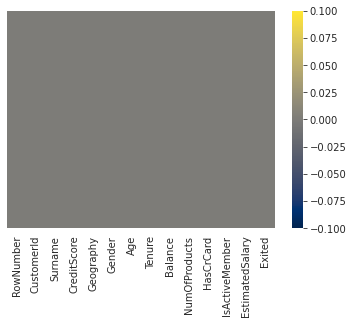

In [315]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='cividis')

In [316]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [317]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


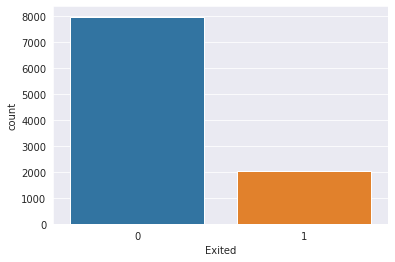

In [318]:
sns.set_style('darkgrid')
sns.countplot(x="Exited", data=df)

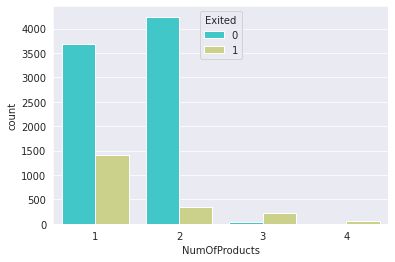

In [319]:
sns.set_style('darkgrid')
sns.countplot(x='NumOfProducts',hue='Exited',data=df,palette='rainbow')

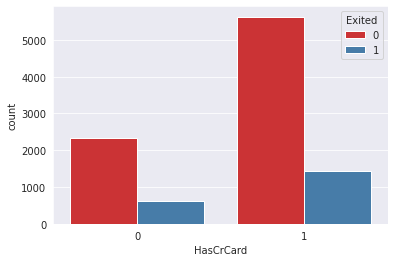

In [320]:
sns.set_style('darkgrid')
sns.countplot(x='HasCrCard',hue='Exited',data=df,palette='Set1')

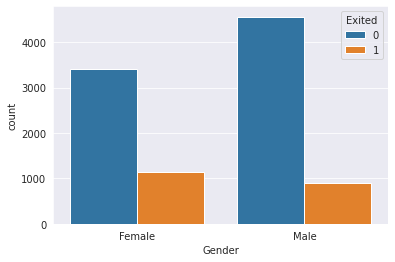

In [321]:
sns.set_style('darkgrid')
sns.countplot(x='Gender',hue='Exited',data=df)

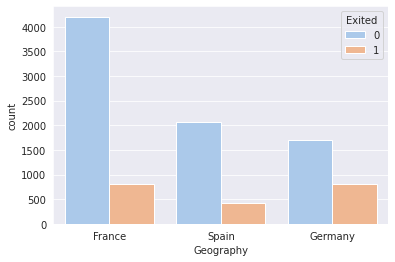

In [322]:
sns.set_style('darkgrid')
sns.countplot(x='Geography',hue='Exited',data=df,palette='pastel')

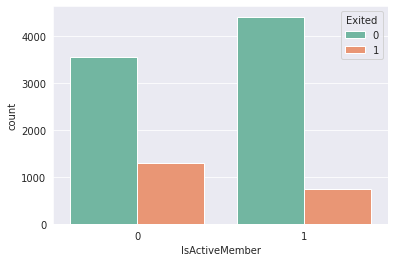

In [323]:
sns.set_style('darkgrid')
sns.countplot(x='IsActiveMember',hue='Exited',data=df,palette='Set2')

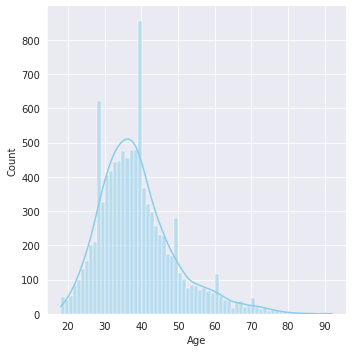

In [324]:
sns.displot(df['Age'].dropna(),kde=True,color='skyblue')

In [325]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [326]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [327]:
df.Gender.unique()

array([0, 1])

In [328]:
df1 = pd.get_dummies(data=df,columns=['Geography'])
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [329]:
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary','Tenure','NumOfProducts']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [330]:
df1

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,2,15647311,Hill,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,3,15619304,Onio,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,4,15701354,Boni,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,5,15737888,Mitchell,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,9997,15569892,Johnstone,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,9998,15584532,Liu,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,9999,15682355,Sabbatini,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [331]:
df1.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [332]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [333]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [334]:
x = df1.drop(['Exited'],axis=1)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [335]:
y = df1['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [337]:
X_train.shape

(8000, 12)

In [338]:
X_test.shape

(2000, 12)

In [339]:
X_train[0:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0
551,0.648,1,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0
8967,0.970,1,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0
4131,0.366,1,0.391892,0.9,0.332196,0.000000,1,1,0.688489,1,0,0
7576,0.652,1,0.121622,0.4,0.000000,0.000000,0,1,0.539772,0,0,1
6066,0.304,1,0.364865,0.0,0.000000,0.000000,0,0,0.423299,1,0,0
3747,0.510,1,0.189189,0.9,0.000000,0.333333,1,1,0.278590,1,0,0
6345,0.808,0,0.229730,0.4,0.000000,0.333333,1,0,0.224117,1,0,0


In [340]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [341]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5696 - accuracy: 0.7664
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7962
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.7995
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8074
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8133
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8133
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8133
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8133
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8163
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4199 - accura

Text(69.0, 0.5, 'Truth')

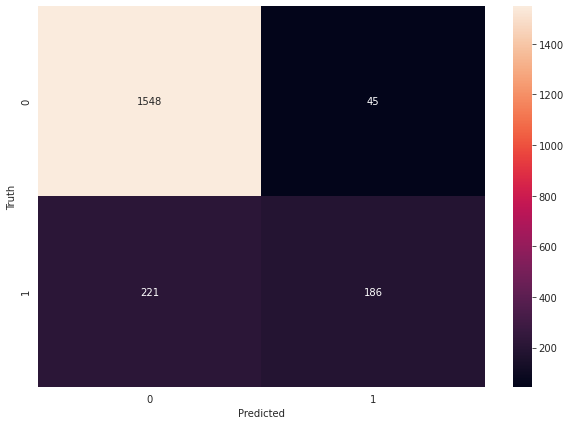

In [342]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [343]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [344]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [345]:
y_test[:10]

5337    1
8732    0
3359    0
5580    0
3485    1
2608    0
5334    0
5953    0
3939    0
6463    0
Name: Exited, dtype: int64

# Method 1: Undersampling

In [346]:
# Class count
count_class_0, count_class_1 = df1.Exited.value_counts()

# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [347]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
1    2037
0    2037
Name: Exited, dtype: int64


In [348]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [349]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [350]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6825 - accuracy: 0.5551
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.6269
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6582
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6230 - accuracy: 0.6640
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6085 - accuracy: 0.6797
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.6950
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.7088
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.7168
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7263
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5394 - accura

Text(69.0, 0.5, 'Truth')

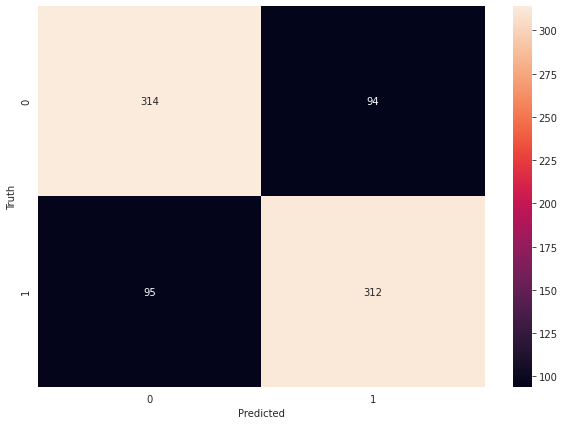

In [351]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Method2: Oversampling

In [352]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
1    7963
0    7963
Name: Exited, dtype: int64


In [353]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [354]:
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6510 - accuracy: 0.6174
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6750
Epoch 3/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5815 - accuracy: 0.6928
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5739 - accuracy: 0.7032
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5697 - accuracy: 0.7086
Epoch 6/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5662 - accuracy: 0.7114
Epoch 7/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5646 - accuracy: 0.7118
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5620 - accuracy: 0.7141
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.7158
Epoch 10/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5570 - accura

Text(69.0, 0.5, 'Truth')

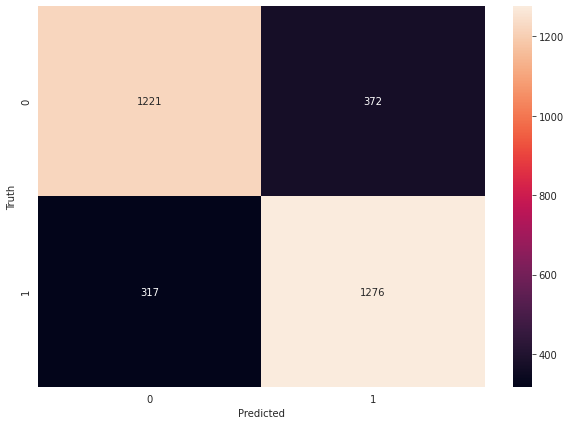

In [355]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Method3: SMOTE

In [356]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [357]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [358]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [359]:
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6719 - accuracy: 0.6024
Epoch 2/100
399/399 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.6914
Epoch 3/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7448
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7568
Epoch 5/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7624
Epoch 6/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5098 - accuracy: 0.7631
Epoch 7/100
399/399 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7637
Epoch 8/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4969 - accuracy: 0.7662
Epoch 9/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.7659
Epoch 10/100
399/399 [==============================] - 0s 1ms/step - loss: 0.4904 - accura

Text(69.0, 0.5, 'Truth')

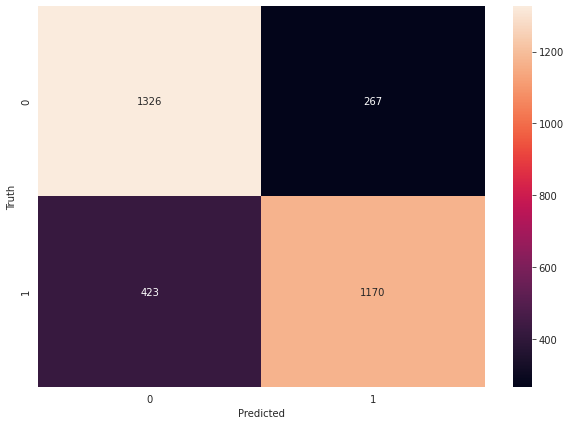

In [360]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred3)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Method4: Use of Ensemble with undersampling

In [361]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [362]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [364]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [365]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [366]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,1,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0,1
8967,0.970,1,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [367]:
df2_class0 = df2[df2.Exited==0]
df2_class1 = df2[df2.Exited==1]

In [368]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [369]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1630)

y_pred4_1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6763 - accuracy: 0.5883
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6319
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6420 - accuracy: 0.6433
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.6521
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6598
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.6660
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.6696
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6118 - accuracy: 0.6764
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.6810
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6000 - accura

In [370]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1630,3260 )

y_pred4_2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6982 - accuracy: 0.5043
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.6282
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6350
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.6494
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6623
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.6761
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.6819
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.6911
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.6926
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5826 - accura

In [371]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 3260, 4890)

y_pred4_3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 1ms/step - loss: 0.6699 - accuracy: 0.5933
Epoch 2/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.6485
Epoch 3/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.6558
Epoch 4/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.6632
Epoch 5/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.6755
Epoch 6/100
102/102 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.6844
Epoch 7/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.6926
Epoch 8/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.6914
Epoch 9/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5807 - accuracy: 0.6991
Epoch 10/100
102/102 [==============================] - 0s 1ms/step - loss: 0.5764 - accura

In [372]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 4890, 6370)

y_pred4_4 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 1s 1ms/step - loss: 0.6589 - accuracy: 0.6219
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6431
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.6611
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.6682
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.6714
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.6765
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.6772
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.6849
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.6910
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.6936
Epoch 11/

In [373]:
y_pred_final = y_pred4_1.copy()
for i in range(len(y_pred4_1)):
    n_ones = y_pred4_1[i] + y_pred4_2[i] + y_pred4_3[i]+y_pred4_4[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [374]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.45      0.78      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



Text(69.0, 0.5, 'Truth')

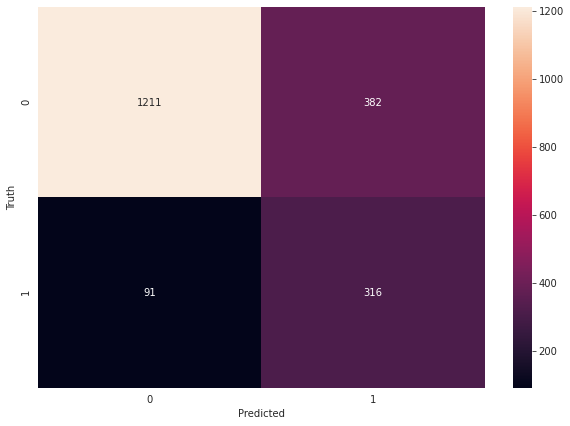

In [375]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_final)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')